# Project 1: Writing a data scientist blog post
<ul>
    <li><a href='#introdaction'>Introdaction</a></li>
    <li><a href='#understanding'>Data Understanding</a></li>
    <li><a href='#preparation'>Data Preparation</a></li>
    <li><a href='#analysis'>Analysis</a>
    <ol>
        <li><a href='#question1'>Question 1</a></li>
        <li><a href='#question2'>Question 2</a></li>
        <li><a href='#question3'>Question 3</a></li>
    </ol>
</ul>

<a id='introdaction'></a>
## Introdaction

In [1]:
# Importing libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='understanding'></a>
## Data Understanding



In [2]:
# Loading the data:
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Displaying the columns:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# Using describe() function to take a look at the data:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='preparation'></a>

## Data Preparation:


In [5]:
# Droping unwanted columns: 
df.drop(['imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],axis=1, inplace=True)
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'genres',
       'production_companies'],
      dtype='object')

In [6]:
# Showing how many missing values in the dataset: 
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
genres                    23
production_companies    1030
dtype: int64

In [7]:
# Drop null values
df.dropna(axis=0,inplace=True)
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
genres                  0
production_companies    0
dtype: int64

In [8]:
# Shwoing how many rows are diplicated?
df.duplicated().sum()

1

In [9]:
# Droping diplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [47]:
# Method that generate a new set and split a specific column to multicable rows
def splitter(column):
    df_split_column = df.copy()
    split_column = df_split_column[column].str.split('|').apply(pd.Series,1).stack().reset_index(level=1,drop=True)
    split_column.name = column + '_split'
    return df_split_column.drop([column], axis=1).join(split_column)

<a id='analysis'></a>
## Analysis: 

<a id='question1'></a>
### Question 1: What are most famous movies?
The number of movies over the years is very large, among these movies there is an elite that has achieved wide fame and has maintained its fame. and this is the top five movies of them

In [ ]:
# Answering the above Question by showing Top 5 movies popularity:
df.sort_values("popularity",ascending=False).head()[['original_title','popularity']]

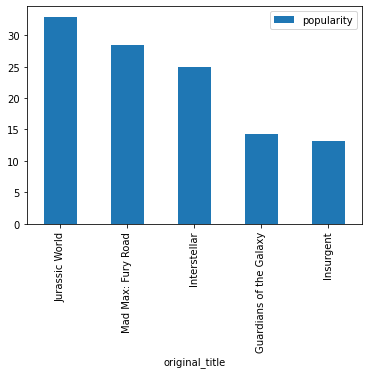

In [48]:
# Showing the result in bar graph:
df[['original_title','popularity']].sort_values("popularity",ascending=False).head().plot.bar(x='original_title',y='popularity');

We can see by the graph that the order of the top 5 popular movies are:
<ol>
    <li><a>Jurassic World</a></li>
    <li><a>Mad Max: Fury Road</a></li>
    <li><a>Interstellar</a></li>
    <li><a>Guardians of the Galaxy</a></li>
    <li><a>Insurgent</a></li>
</ol>

<a id='question2'></a>
### Question2:  What are the most popular genre?
People's tastes differ, and according to different tastes, their love for movies genres are different. And according to people taste movies producers produce more movies with that genre. This is the most genres loveable by people.

In [45]:
# Answering the above Question by showing the higher geners with the number of movies in eche one
splitted_df = splitter('genres')
splitted_df['genres_split'].value_counts().head()

Drama       4372
Comedy      3442
Thriller    2748
Action      2239
Romance     1572
Name: genres_split, dtype: int64

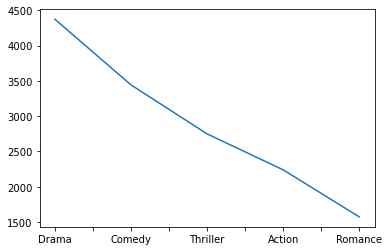

In [46]:
# Showing the result in plot graph:
splitted_df['genres_split'].value_counts().head().plot();


We can see by that the order of the top 5 popular genres are:
<ol>
    <li><a>Drama</a></li>
    <li><a>Comedy</a></li>
    <li><a>Thriller</a></li>
    <li><a>Action</a></li>
    <li><a>Romantic</a></li>
</ol>

<a id='question3'></a>
### Question3: What is the top 10 movies that have the most profit in Marvel Studios?
Marvel Studios consider as the biggest production company in the super hero's movies here is the most 10 movies grossing in Marvel's history

In [50]:
# answering the above Question by Showing the most profit movies done by marvil studios:
df['profit']=df.revenue-df.budget
Marvel_Studios=df[df.production_companies.str.contains('Marvel Studios')][["original_title","production_companies","profit"]].sort_values(by="profit",ascending=False).head(10)
Marvel_Studios

,original_title,production_companies,profit
4361,The Avengers,Marvel Studios,1299557910
14,Avengers: Age of Ultron,Marvel Studios|Prime Focus|Revolution Sun Studios,1125035767
5425,Iron Man 3,Marvel Studios,1015439994
630,Guardians of the Galaxy,Marvel Studios|Moving Picture Company (MPC)|Bu...,603312399
631,Captain America: The Winter Soldier,Marvel Studios,544766572
2877,Iron Man,Marvel Studios,445174222
1920,Iron Man 2,Marvel Studios,423933331
17,Ant-Man,Marvel Studios,388602163
5424,Thor: The Dark World,Marvel Studios,309765000
3377,Thor,Marvel Studios|Marvel Entertainment,294115007


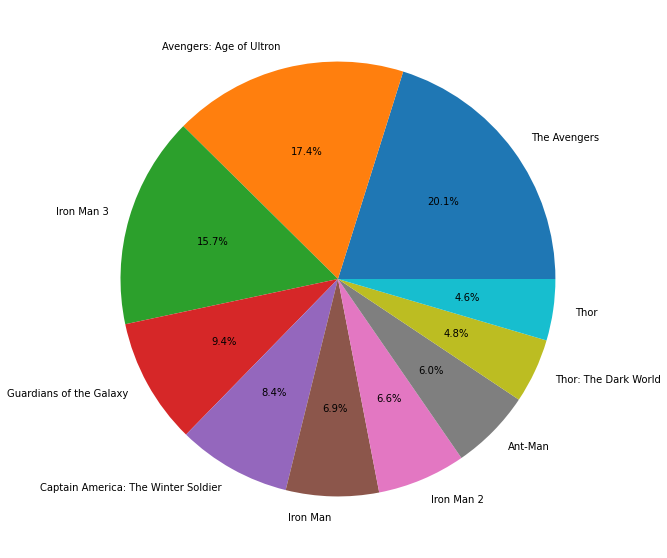

In [51]:
# Showing the most profit movies done by marvil studios
df[df.production_companies.str.contains('Marvel Studios')].sort_values(by="profit",ascending=False).head(10).profit.plot(labels=Marvel_Studios['original_title'] , autopct='%1.1f%%' , kind='pie' , figsize=(10,10) )
plt.ylabel(" ");

We can Find by the pie-chart that the highest profit movies in marvel's history is The Avengers